<a href="https://colab.research.google.com/github/chajunhyeop/-/blob/main/ubion5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#신경망
##분류예측

In [26]:
import pandas as pd


df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Ashopping.csv",encoding = 'cp949')

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [28]:
df.isnull().sum()

고객ID         0
이탈여부         0
총매출액         0
구매금액대        0
방문빈도         0
1회 평균매출액     0
할인권 사용 횟수    0
총 할인 금액      0
고객등급         0
구매유형         0
클레임접수여부      0
구매카테고리수      0
거주지역         0
성별           0
고객 나이대       0
거래기간         0
할인민감여부       0
Recency      0
Frequency    0
Monetary     0
평균 구매주기      0
dtype: int64

In [29]:
df.describe()

,고객ID,이탈여부,총매출액,구매금액대,방문빈도,1회 평균매출액,할인권 사용 횟수,총 할인 금액,고객등급,구매유형,...,구매카테고리수,거주지역,성별,고객 나이대,거래기간,할인민감여부,Recency,Frequency,Monetary,평균 구매주기
count,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.00000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,...,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,0.300000,5.858013e+06,0.700000,22.91100,3.521024e+05,16.027000,292371.670000,1.546000,2.656000,...,5.217000,5.147000,0.189000,3.964000,3495.891000,0.400000,4.925000,2.289000,4.129000,266.880824
std,288.819436,0.458487,5.812815e+06,0.781416,19.08217,3.124636e+05,8.341334,111937.501042,0.498129,1.046307,...,2.224153,1.169084,0.391705,1.078827,965.966194,0.490143,1.744253,1.669811,1.560383,254.077398
min,1.000000,0.000000,1.886100e+06,0.000000,1.00000,2.708200e+04,1.000000,3750.000000,1.000000,1.000000,...,1.000000,1.000000,0.000000,2.000000,827.000000,0.000000,1.000000,1.000000,1.000000,13.980645
25%,250.750000,0.000000,2.815905e+06,0.000000,10.75000,1.631242e+05,9.000000,261686.250000,1.000000,2.000000,...,3.000000,4.000000,0.000000,3.000000,2871.000000,0.000000,4.000000,1.000000,3.000000,111.957671
50%,500.500000,0.000000,4.092145e+06,0.500000,18.00000,2.582080e+05,17.000000,347500.000000,2.000000,2.000000,...,5.000000,5.000000,0.000000,4.000000,3836.000000,0.000000,5.000000,2.000000,4.000000,191.469697
75%,750.250000,1.000000,6.545392e+06,1.000000,28.00000,4.268310e+05,23.000000,365400.000000,2.000000,4.000000,...,7.000000,6.000000,0.000000,5.000000,4207.250000,1.000000,7.000000,3.000000,6.000000,324.386218
max,1000.000000,1.000000,6.759576e+07,2.000000,155.00000,2.798500e+06,30.000000,400600.000000,2.000000,4.000000,...,9.000000,7.000000,1.000000,7.000000,5334.000000,1.000000,7.000000,7.000000,7.000000,1956.000000


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

In [31]:
#분류예측

#변수선택
X = df[["총매출액", "1회 평균매출액", "평균 구매주기", "거래기간", "구매금액대"]]
Y = df["할인민감여부"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#데이터 전처리
ct = ColumnTransformer([('scaling', StandardScaler(), ["총매출액", "1회 평균매출액", "평균 구매주기", "거래기간"]),
                        ("onehot", OneHotEncoder(sparse = False), ["구매금액대"])])
ct.fit(X_train)

X_train= ct.transform(X_train)
X_test= ct.transform(X_test)

#오버샘플링
from imblearn.over_sampling import SMOTE #Synthetic minority over-sampling techniqe

X_train, Y_train = SMOTE(random_state = 0).fit_resample(X_train, Y_train)

In [32]:
#모델링
from sklearn.neural_network import MLPClassifier

In [33]:
nn_model = MLPClassifier(random_state=0, alpha = 0.001, hidden_layer_sizes = [50])

#모형 학습
nn_model.fit(X_train, Y_train)

#예측
Y_pred = nn_model.predict(X_test)

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [34]:
# 결과값 보고
print("Y 예측값 \n", Y_pred)
print("accuracy(train) : {:.3f}".format(nn_model.score(X_train, Y_train)))
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred))

Y 예측값 
 [1 1 0 0 1 1 0 0 0 1 0 1 1 0 1 0 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 1 1 1 1 1
 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 1 1 1 0 1 1 0 0 0 1 1 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0
 1 1 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 1 1 0 1 0 1 0 0 1 0 0 0 1 0 1
 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 0 0 1 1 1
 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0
 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0
 0 0 0 0]
accuracy(train) : 0.889
              precision    recall  f1-score   support

           0       0.92      0.89      0.91       177
           1       0.85      0.89      0.87       123

    accuracy                           0.89       300
   macro avg       0.89      0.89      0.89       300
weighted avg       0.89      0.89      0.89       300



In [35]:
import numpy as np

#변수선택
X = df[df.이탈여부 == 0][["방문빈도", "총 할인 금액", "고객등급", "구매유형", "거래기간", "할인민감여부", "평균 구매주기"]]
Y = df[df.이탈여부 == 0]["1회 평균매출액"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#데이터 전처리
ct = ColumnTransformer([('scaling', StandardScaler(), ["방문빈도", "총 할인 금액", "거래기간", "평균 구매주기"]),
                        ("onehot", OneHotEncoder(sparse = False), ["고객등급", "구매유형", "할인민감여부"])])
ct.fit(X_train)

X_train= ct.transform(X_train)
X_test= ct.transform(X_test)


In [36]:
from sklearn.neural_network import MLPRegressor

#모델 생성
nn_reg_model = MLPRegressor(random_state = 0, alpha = 1, max_iter = 1000,
                            hidden_layer_sizes = [50,50])

#모형학습 및 예측
nn_reg_model.fit(X_train, Y_train)
Y_pred = nn_reg_model.predict(X_test)

#결과값 보고
print("Y predict value : \n", Y_pred)
print("train accuracy : {:.3f}".format(nn_reg_model.score(X_train, Y_train)))
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE : {:.3f}".format(rmse))

Y predict value : 
 [367567.22799569 291986.7171292  286542.39507057 470299.18982825
 199015.43022523 314985.16674704 120385.261673    99679.50744792
 217207.85032309 321283.5694424  322281.24636508 139031.08090941
 172479.30691299 307474.28058998 410674.7673535  282802.14200659
 314022.43590656 344082.61534343 266080.18516834 299527.46258462
 417918.96528793 213628.82138014 325703.16436337 276841.23973322
  83289.89193415 370306.40166324 392255.59988171 148021.81268408
 135257.54780785 288250.40948644 329672.79002503 409898.41100752
 238134.15585775 368306.05176262 275290.22641391 239081.40629288
 266321.69500888 375448.00373975 246605.1330584  641448.06611111
 336904.01756403 215252.99856889 241609.33155848 271063.86770618
 236907.37454933 382141.50786421 141280.68282403 289125.50608539
 298377.15265302 346302.09403242 253397.19897089 508363.2921946
  55430.52886374 316398.6845584  307992.35916116 291458.05176895
 365830.87156821 337348.7566333  283210.3790915  258622.02741059
 32137

/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


#딥러닝
##경고문 제거

In [37]:
import warnings
warnings.filterwarnings("ignore")

In [38]:
#변수선택
X = df[["총매출액", "1회 평균매출액", "평균 구매주기", "거래기간", "구매금액대"]]
Y = df["할인민감여부"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#데이터 전처리
ct = ColumnTransformer([('scaling', StandardScaler(), ["총매출액", "1회 평균매출액", "평균 구매주기", "거래기간"]),
                        ("onehot", OneHotEncoder(sparse = False), ["구매금액대"])])
ct.fit(X_train)

X_train= ct.transform(X_train)
X_test= ct.transform(X_test)

#오버샘플링
from imblearn.over_sampling import SMOTE #Synthetic minority over-sampling techniqe

X_train, Y_train = SMOTE(random_state = 0).fit_resample(X_train, Y_train)

In [39]:
import keras
import tensorflow as tf

from keras.models import Sequential  #노드에 레이어가 생기는 데 신경망에는 레이어가 있다.
#그리고 노드가 있는데 이런 레이더들이 이어져서 아웃풋으로 이어진다.
#시퀀셜을 순차적으로 가는 것을 만드는 것이다.
from keras.layers import Dense, Activation#dense는 노드들의 수이다.
#노드의 밀도를 정해주는데 밀도가 높다는 것은 그 중에서 계산이 많다는 것이다.
from keras.metrics import Accuracy

#시드값 설정
np.random.seed(0)
tf.random.set_seed(0)

#모형생성
model = keras.models.Sequential()#순차적인 모형을 형성
model.add(keras.layers.Dense(64, input_dim=7, activation = "relu")) #레이어나 밀도를 추가한다.
#input dim= 7 -> 7차원의 신경망을 만들겠다. -> 밀도는 64이다. 하이퍼파라미터 지정 활성화함수 (activation)
model.add(keras.layers.Dense(64, activation = "relu"))
model.add(keras.layers.Dense(1, activation = "sigmoid"))

#모형학습
#불순도 확인 모델이 얼마나 불순도를 없앴는지, 불순도는 적합성과 반비례관계를 가진다.
#메트릭스는 적합도를 보여준다
model.compile(loss = "binary_crossentropy", optimizer = "adam", metrics = ["accuracy"])

history = model.fit(X_train, Y_train, validation_split = 0.2, epochs = 100, 
                    batch_size = 64, verbose = 2)
#변수를 지정하기 위해서 지정 두개의 훈련셋을 넣어서 100번의 계산을 시도한다.
#1부터 시작 - 100까지 계산한다. 대신 계산이 오래걸림
#벤치 사이즈와 벌보스는 그냥 디폴트값으로 사용하면 된다. 
#적정한 에폭을 결정하는것이 중요하다.

Epoch 1/100
11/11 - 2s - loss: 0.6829 - accuracy: 0.5888 - val_loss: 0.6856 - val_accuracy: 0.6529 - 2s/epoch - 159ms/step
Epoch 2/100
11/11 - 0s - loss: 0.5836 - accuracy: 0.8254 - val_loss: 0.6330 - val_accuracy: 0.6471 - 87ms/epoch - 8ms/step
Epoch 3/100
11/11 - 0s - loss: 0.5174 - accuracy: 0.8284 - val_loss: 0.6003 - val_accuracy: 0.6765 - 79ms/epoch - 7ms/step
Epoch 4/100
11/11 - 0s - loss: 0.4679 - accuracy: 0.8328 - val_loss: 0.5588 - val_accuracy: 0.7353 - 88ms/epoch - 8ms/step
Epoch 5/100
11/11 - 0s - loss: 0.4343 - accuracy: 0.8595 - val_loss: 0.5102 - val_accuracy: 0.8118 - 84ms/epoch - 8ms/step
Epoch 6/100
11/11 - 0s - loss: 0.4104 - accuracy: 0.8624 - val_loss: 0.5205 - val_accuracy: 0.7882 - 150ms/epoch - 14ms/step
Epoch 7/100
11/11 - 0s - loss: 0.3902 - accuracy: 0.8713 - val_loss: 0.4881 - val_accuracy: 0.8235 - 97ms/epoch - 9ms/step
Epoch 8/100
11/11 - 0s - loss: 0.3756 - accuracy: 0.8802 - val_loss: 0.4970 - val_accuracy: 0.8176 - 114ms/epoch - 10ms/step
Epoch 9/100


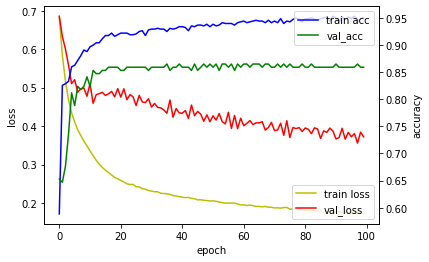

In [40]:
#에폭에 나왔단 로스랑 어큐러씨를 그려본다.(크로스 되는 지점 확인)
import matplotlib.pyplot as plt

fig,loss_ax = plt.subplots()
acc_ax = loss_ax.twinx()

#loss(오차) 그리기
loss_ax.plot(history.history["loss"], "y", label = "train loss")
loss_ax.plot(history.history["val_loss"], "r", label = "val_loss")
loss_ax.set_xlabel("epoch")
loss_ax.set_ylabel("loss")
loss_ax.legend(loc = "lower right") #legend 는 범례 

#accuracy(정확도) 그리기
acc_ax.plot(history.history["accuracy"], "b", label = "train acc")
acc_ax.plot(history.history["val_accuracy"], "g", label = "val_acc")
acc_ax.set_ylabel("accuracy")
acc_ax.legend(loc = "upper right") #legend 는 범례 

plt.show()

In [41]:
model.fit(X_train, Y_train, validation_split = 0.2, epochs = 20, batch_size = 64, verbose = 1)

Epoch 1/20
11/11 [==============================] - 0s 7ms/step - loss: 0.1702 - accuracy: 0.9497 - val_loss: 0.3680 - val_accuracy: 0.8588
Epoch 2/20
11/11 [==============================] - 0s 5ms/step - loss: 0.1697 - accuracy: 0.9512 - val_loss: 0.3609 - val_accuracy: 0.8588
Epoch 3/20
11/11 [==============================] - 0s 4ms/step - loss: 0.1706 - accuracy: 0.9497 - val_loss: 0.3671 - val_accuracy: 0.8588
Epoch 4/20
11/11 [==============================] - 0s 8ms/step - loss: 0.1696 - accuracy: 0.9497 - val_loss: 0.3579 - val_accuracy: 0.8647
Epoch 5/20
11/11 [==============================] - 0s 5ms/step - loss: 0.1683 - accuracy: 0.9512 - val_loss: 0.3734 - val_accuracy: 0.8588
Epoch 6/20
11/11 [==============================] - 0s 4ms/step - loss: 0.1685 - accuracy: 0.9512 - val_loss: 0.3627 - val_accuracy: 0.8588
Epoch 7/20
11/11 [==============================] - 0s 4ms/step - loss: 0.1688 - accuracy: 0.9527 - val_loss: 0.3614 - val_accuracy: 0.8588
Epoch 8/20
11/11 [==

In [42]:
Y_pred  = model.predict(X_test, verbose = 0)
Y_class = np.round(Y_pred, 0)
train_score = model.evaluate(X_train, Y_train, verbose=0)
test_score = model.evaluate(X_test, Y_test, verbose=0)
print("Y 예측값 : \n", Y_pred[:5])
print("Y 예측 클래스 : \n ", Y_class[:5] )
print("train accuracy : {:.3f}".format(train_score[0], train_score[1]))
print("test accuracy : {:.3f}".format(test_score[0], test_score[1]))

Y 예측값 : 
 [[0.93126047]
 [1.        ]
 [0.01772536]
 [0.01244921]
 [0.99973166]]
Y 예측 클래스 : 
  [[1.]
 [1.]
 [0.]
 [0.]
 [1.]]
train accuracy : 0.202
test accuracy : 0.224


#수치예측

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [44]:
df.columns
import numpy as np
import keras
import tensorflow as tf

In [45]:
X=df[df.이탈여부==0][["방문빈도", "총 할인 금액", "구매카테고리수", "거래기간"]]
Y=np.log1p(df[df.이탈여부==0]["1회 평균매출액"])

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#데이터 전처리
scalar = StandardScaler().fit(X_train)
X_train= scalar.transform(X_train)
X_test= scalar.transform(X_test)

#seed값 설정
np.random.seed(0)
tf.random.set_seed(0)

#모형생성
model = keras.models.Sequential()#순차적인 모형을 형성
model.add(keras.layers.Dense(64, input_dim=4, activation = "relu")) #레이어나 밀도를 추가한다.
#input dim= 7 -> 7차원의 신경망을 만들겠다. -> 밀도는 64이다. 하이퍼파라미터 지정 활성화함수 (activation)
model.add(keras.layers.Dense(64, activation = "relu"))
model.add(keras.layers.Dense(64, activation = "relu"))

#모형학습
#불순도 확인 모델이 얼마나 불순도를 없앴는지, 불순도는 적합성과 반비례관계를 가진다.
#메트릭스는 적합도를 보여준다
model.compile(loss = "mse", optimizer = "SGD")
Y_pred = np.round(model.predict(X_test[:5], verbose=0), 3)
print("Y predict value \n", Y_pred)

#모형 평가
train_score = model.evaluate(X_train, Y_train, verbose=0)
test_score = model.evaluate(X_test, Y_test, verbose=0)
print("train mse : {:.3f}".format(train_score))
print("test mse : {:.3f}".format(test_score))

Y predict value 
 [[0.    0.    0.    0.234 0.    0.163 0.052 0.    0.    0.    0.    0.32
  0.013 0.    0.218 0.009 0.111 0.    0.182 0.    0.    0.    0.474 0.143
  0.    0.    0.    0.    0.    0.    0.325 0.    0.    0.224 0.    0.098
  0.115 0.    0.    0.055 0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.322 0.12  0.098 0.    0.336 0.142 0.    0.    0.394 0.    0.498
  0.    0.    0.182 0.   ]
 [0.    0.    0.    0.002 0.    0.134 0.114 0.    0.109 0.    0.    0.058
  0.061 0.043 0.042 0.027 0.06  0.097 0.114 0.    0.    0.001 0.14  0.
  0.081 0.017 0.    0.034 0.    0.    0.012 0.009 0.    0.045 0.    0.039
  0.    0.    0.    0.109 0.    0.009 0.004 0.    0.    0.    0.    0.
  0.059 0.097 0.074 0.026 0.    0.014 0.184 0.    0.002 0.061 0.075 0.146
  0.    0.    0.289 0.   ]
 [0.    0.    0.079 0.012 0.    0.056 0.061 0.    0.175 0.    0.089 0.14
  0.002 0.    0.254 0.04  0.094 0.183 0.181 0.    0.058 0.    0.385 0.058
  0.    0.    0.    0.057 0.    0.    0.144 0.051 0

#앙상블


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   고객ID       1000 non-null   int64  
 1   이탈여부       1000 non-null   int64  
 2   총매출액       1000 non-null   int64  
 3   구매금액대      1000 non-null   int64  
 4   방문빈도       1000 non-null   int64  
 5   1회 평균매출액   1000 non-null   int64  
 6   할인권 사용 횟수  1000 non-null   int64  
 7   총 할인 금액    1000 non-null   int64  
 8   고객등급       1000 non-null   int64  
 9   구매유형       1000 non-null   int64  
 10  클레임접수여부    1000 non-null   int64  
 11  구매카테고리수    1000 non-null   int64  
 12  거주지역       1000 non-null   int64  
 13  성별         1000 non-null   int64  
 14  고객 나이대     1000 non-null   int64  
 15  거래기간       1000 non-null   int64  
 16  할인민감여부     1000 non-null   int64  
 17  Recency    1000 non-null   int64  
 18  Frequency  1000 non-null   int64  
 19  Monetary   1000 non-null   int64  
 20  평균 구매주기  

In [47]:
#변수선택
X = df[["총매출액", "구매금액대", "1회 평균매출액", "평균 구매주기", "거래기간"]]
Y = df["할인민감여부"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#데이터 전처리
ct = ColumnTransformer([('scaling', StandardScaler(), ["총매출액", "1회 평균매출액", "평균 구매주기", "거래기간"]),
                        ("onehot", OneHotEncoder(sparse = False), ["구매금액대"])])
ct.fit(X_train)

X_train= ct.transform(X_train)
X_test= ct.transform(X_test)

smote = SMOTE(random_state = 0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [48]:
################################################################33
######################으억
from sklearn.ensemble import VotingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

dtree = DecisionTreeClassifier(random_state = 0)
knn = KNeighborsClassifier()

#앙상블 모형 생성
model = VotingClassifier(estimators = [("K-NN", knn), ("Dtree", dtree)], voting = "soft")

#모형학습
model.fit(X_train, Y_train)

#예측 및 모형 성능 평가
Y_pred = model.predict(X_test)
print("Y predict value : \n", Y_pred)
#8-1 보팅모형 정확도
print("voting classifier accuracy : {0:.3f}".format(model.score(X_test, Y_test)))
#8-2 개별모형 정확도
classifiers = [dtree, knn]
for classifier in classifiers :
  classifier.fit(X_train, Y_train)
  class_name = classifier.__class__.__name__
  print("{0} accuracy : {1:3f}". format(class_name, classifier.score(X_test, Y_test)))

Y predict value : 
 [1 1 0 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 1 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 1 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 1
 1 0 0 0 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 1 1 0 1 0 0 0 1 0 0 0 1 1 1
 1 0 0 1 1 0 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1 0 1 1 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 1 1 1 1 0 0 1 0 0 0 1 0 1 1 0 0
 1 0 0 0]
voting classifier accuracy : 0.907
DecisionTreeClassifier accuracy : 0.900000
KNeighborsClassifier accuracy : 0.850000


In [49]:
#변수선택
X = df[df.이탈여부 == 0][["방문빈도", "총 할인 금액", "고객등급", "구매유형", "거래기간", "할인민감여부", "평균 구매주기"]]
Y = np.log1p(df[df.이탈여부 == 0]["1회 평균매출액"])

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#데이터 전처리
ct = ColumnTransformer([('scaling', StandardScaler(), ["방문빈도", "총 할인 금액", "거래기간", "평균 구매주기"]),
                        ("onehot", OneHotEncoder(sparse = False), ["고객등급", "구매유형", "할인민감여부"])])
ct.fit(X_train)
X_train= ct.transform(X_train)
X_test= ct.transform(X_test)

In [50]:
from sklearn.ensemble import VotingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR

svr=SVR()
mlp=MLPRegressor(random_state=0)

#5 voting model 생성
model = VotingRegressor(estimators = [("SVR", svr), ("MLP", mlp)])

#6 모형 학습
model.fit(X_train, Y_train)

#7 예측 및 평가
Y_pred = model.predict(X_test)
print("Y predict value \n", Y_pred)
#8-1 보팅모형 정확도
print("voting regressor accuracy : {0:.3f}".format(model.score(X_test, Y_test)))
#8-2 개별모형 정확도
Regressors = [svr, mlp]
for Regressors in Regressors :
  Regressors.fit(X_train, Y_train)
  class_name = Regressors.__class__.__name__
  print("{0} accuracy : {1:3f}". format(class_name, Regressors.score(X_test, Y_test)))

Y predict value 
 [12.72637282 12.15785517 12.09686124 13.26831502 11.60231958 12.47233857
 11.00403584 12.11236139 11.92418038 12.36295705 12.33471768 11.93634366
 12.10248328 12.17485959 12.54047237 12.21174042 12.79796392 12.85868158
 12.14723369 12.51820132 12.73655925 11.51053651 12.16572772 12.61967869
 10.97450508 13.11252037 12.5792913  12.13627155 12.04792775 11.98604929
 12.79524713 12.95793432 12.51574594 13.14826771 12.21608558 11.91077705
 11.84798695 12.99567742 11.95362493 13.66455063 12.85068225 12.1427706
 12.49680643 12.12413092 12.41795186 12.43119996 11.29956398 12.14660018
 12.69704459 12.43998557 12.01109351 13.29011823 11.1046136  12.92296162
 12.8522466  12.08692287 12.46809297 12.34155171 12.26251834 12.06954504
 12.87142564 12.96736873 11.66603809 12.35227513 12.06159606 12.155967
 12.10647664 11.48482286 12.69218789 11.79509489 12.20279207 11.67227129
 11.93748831 11.75242257 12.08799173 12.79011812 12.43771399 12.93671652
 12.21409548 12.39436336 12.71746922

In [51]:
#URL 쓰기

import pandas as pd
import urllib.request
import json


client_id = "U6T2yf5vdHviz6u5luir"
client_secret = "2lFmRI34fo"


url = "https://openapi.naver.com/v1/datalab/search"
body = "{\
         \"startDate\":\"2022-10-01\",\
         \"endDate\":\"2023-01-01\",\
         \"timeUnit\":\"date\",\
         \"keywordGroups\":[{\"groupName\":\"유비온\",\"keywords\":[\"유비온\",\"korean\"]},\
                             {\"groupName\":\"영어\",\"keywords\":[\"영어\",\"english\"]}\
                            ],\
         \"device\":\"pc\",\
         \"ages\":[\"1\",\"2\"],\
         \"gender\":\"f\"\
         }";

request = urllib.request.Request(url)
request.add_header("X-Naver-Client-Id",client_id)
request.add_header("X-Naver-Client-Secret",client_secret)
request.add_header("Content-Type","application/json")

response = urllib.request.urlopen(request, data=body.encode("utf-8"))

rescode = response.getcode()

if(rescode==200):
    response_body = response.read()
    response_data = response_body.decode('utf-8')
else:
    print("Error Code:" + rescode)

result = json.loads(response_data)

print(result)

date = [a['period'] for a in result['results'][0]['data']]
ratio_data1 = [a['ratio'] for a in result['results'][0]['data']]
ratio_data2 = [a['ratio'] for a in result['results'][1]['data']]

pd.DataFrame({'date':date,
        'seraching_result':ratio_data1})

{'startDate': '2022-10-01', 'endDate': '2023-01-01', 'timeUnit': 'date', 'results': [{'title': '유비온', 'keywords': ['유비온', 'korean'], 'data': [{'period': '2022-10-02', 'ratio': 2}, {'period': '2022-10-03', 'ratio': 6}, {'period': '2022-10-04', 'ratio': 2}, {'period': '2022-10-05', 'ratio': 8}, {'period': '2022-10-10', 'ratio': 2}, {'period': '2022-10-11', 'ratio': 4}, {'period': '2022-10-13', 'ratio': 4}, {'period': '2022-10-15', 'ratio': 4}, {'period': '2022-10-16', 'ratio': 2}, {'period': '2022-10-17', 'ratio': 2}, {'period': '2022-10-18', 'ratio': 2}, {'period': '2022-10-21', 'ratio': 2}, {'period': '2022-10-25', 'ratio': 2}, {'period': '2022-10-26', 'ratio': 4}, {'period': '2022-10-28', 'ratio': 2}, {'period': '2022-10-31', 'ratio': 4}, {'period': '2022-11-02', 'ratio': 4}, {'period': '2022-11-05', 'ratio': 2}, {'period': '2022-11-07', 'ratio': 6}, {'period': '2022-11-09', 'ratio': 4}, {'period': '2022-11-11', 'ratio': 2}, {'period': '2022-11-14', 'ratio': 4}, {'period': '2022-11-16

,date,seraching_result
0,2022-10-02,2
1,2022-10-03,6
2,2022-10-04,2
3,2022-10-05,8
4,2022-10-10,2
5,2022-10-11,4
6,2022-10-13,4
7,2022-10-15,4
8,2022-10-16,2
9,2022-10-17,2


In [52]:
#변수선택
X = df[["총매출액", "구매금액대", "1회 평균매출액", "평균 구매주기", "거래기간"]]
Y = df["할인민감여부"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#데이터 전처리
ct = ColumnTransformer([('scaling', StandardScaler(), ["총매출액", "1회 평균매출액", "평균 구매주기", "거래기간"]),
                        ("onehot", OneHotEncoder(sparse = False), ["구매금액대"])])
ct.fit(X_train)

X_train= ct.transform(X_train)
X_test= ct.transform(X_test)

smote = SMOTE(random_state = 0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [53]:
#모형 생성
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 0, n_estimators = 300, max_depth = 3)
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y_predict value: \m", Y_pred)
print("accuracy(test): {:.3f}".format(model.score(X_test, Y_test)))
print(classification_report(Y_test, Y_pred))


Y_predict value: \m [1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1
 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 0 0
 0 0 0 0]
accuracy(test): 0.947
              precision    recall  f1-score   support

           0       0.92      0.99      0.96       177
           1       0.99      0.88      0.93       123

    accuracy                           0.95       300
   macro avg       0.96      0.94      0.94       300
weighted avg       0.95      0.95      0.95       300



In [ ]:
#변수선택
X = df[df.이탈여부 == 0][["방문빈도", "총 할인 금액", "고객등급", "구매유형", "거래기간", "할인민감여부", "평균 구매주기"]]
Y = np.log1p(df[df.이탈여부 == 0]["1회 평균매출액"])

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#데이터 전처리
ct = ColumnTransformer([('scaling', StandardScaler(), ["방문빈도", "총 할인 금액", "거래기간", "평균 구매주기"]),
                        ("onehot", OneHotEncoder(sparse = False), ["고객등급", "구매유형", "할인민감여부"])])
ct.fit(X_train)
X_train= ct.transform(X_train)
X_test= ct.transform(X_test)

In [55]:
#모형생성
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(random_state = 0, n_estimators = 100, max_depth = 4)

#5. 모형 에측 평가
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value : \n", Y_pred)
print("accuracy(R2) : {:.3f}". format(model.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE :", rmse)

Y predict value : 
 [1.         1.         0.11744215 0.05016315 1.         1.
 0.07238019 0.11241476 0.13835006 1.         0.13030363 0.12825997
 1.         0.11692024 1.         0.09050479 1.         0.0842891
 0.12137086 0.11798424 0.08577163 0.11223331 0.11070843 0.13532671
 0.12739543 1.         0.08289355 0.08577163 0.12400498 0.05647365
 1.         1.         1.         1.         0.11045272 1.
 1.         0.08577163 1.         0.1244963  0.0543375  1.
 1.         1.         0.11728393 0.05047439 1.         0.11959046
 0.3518854  0.05047439 1.         0.11847929 0.11038671 0.09449241
 1.         1.         0.0842891  0.09050479 1.         1.
 0.11220638 1.         1.         0.14918503 0.11120341 0.11341773
 1.         0.14023568 0.11940419 0.08071439 1.         0.27805003
 0.0896234  0.13326402 1.         0.08364049 0.11241476 0.08617314
 0.13877628 1.         0.08577163 0.11262796 0.0841049  1.
 1.         1.         0.11940419 0.11049757 0.11074738 0.05647365
 1.         0.07

그리디안 부스트

In [56]:
#변수선택
X = df[["총매출액", "구매금액대", "1회 평균매출액", "평균 구매주기", "거래기간"]]
Y = df["할인민감여부"]

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#데이터 전처리
ct = ColumnTransformer([('scaling', StandardScaler(), ["총매출액", "1회 평균매출액", "평균 구매주기", "거래기간"]),
                        ("onehot", OneHotEncoder(sparse = False), ["구매금액대"])])
ct.fit(X_train)

X_train= ct.transform(X_train)
X_test= ct.transform(X_test)

smote = SMOTE(random_state = 0)
X_train, Y_train = smote.fit_resample(X_train, Y_train)

In [57]:
#모형 생성
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier(random_state=0, n_estimators = 100, max_depth = 4, learning_rate = 0.1)

#모형 학습 예측
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y_predict value: \m", Y_pred)
print("accuracy(test): {:.3f}".format(model.score(X_test, Y_test)))
print(classification_report(Y_test, Y_pred))


Y_predict value: \m [1 1 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 1 1 0 1 1
 0 1 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 1 0 0 0 1 0 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0
 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 1 0 0 0 0 0 1 0 0
 1 1 0 1 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 1
 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 1 1 1
 1 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 1 0 1 0 0 0 1 1 0 1
 1 1 1 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0
 0 0 0 0]
accuracy(test): 0.933
              precision    recall  f1-score   support

           0       0.92      0.97      0.94       177
           1       0.95      0.89      0.92       123

    accuracy                           0.93       300
   macro avg       0.94      0.93      0.93       300
weighted avg       0.93      0.93      0.93       300



In [59]:
#변수선택
X = df[df.이탈여부 == 0][["방문빈도", "총 할인 금액", "고객등급", "구매유형", "거래기간", "할인민감여부", "평균 구매주기"]]
Y = np.log1p(df[df.이탈여부 == 0]["1회 평균매출액"])

#데이터 분할(train, test)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

#데이터 전처리
ct = ColumnTransformer([('scaling', StandardScaler(), ["방문빈도", "총 할인 금액", "거래기간", "평균 구매주기"]),
                        ("onehot", OneHotEncoder(sparse = False), ["고객등급", "구매유형", "할인민감여부"])])
ct.fit(X_train)
X_train= ct.transform(X_train)
X_test= ct.transform(X_test)

In [60]:
# 모형생성
from sklearn.ensemble import GradientBoostingRegressor
model = GradientBoostingRegressor(random_state = 0, n_estimators = 100, max_depth =4, learning_rate = 0.1)

#5. 모형 에측 평가
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)
print("Y predict value : \n", Y_pred)
print("accuracy(R2) : {:.3f}". format(model.score(X_train, Y_train)))
rmse = sqrt(mean_squared_error(Y_test, Y_pred))
print("RMSE :", rmse)

Y predict value : 
 [12.62344813 12.25583406 12.09458751 13.07090617 11.40422303 12.45220348
 11.61198904 12.45651119 12.08328814 12.32640447 12.39533751 12.23594472
 12.13577357 12.24057416 12.73503493 12.29364736 12.84361351 12.99742565
 11.76512764 12.45752565 12.63483127 11.38579233 12.41560355 12.50712961
 10.79435548 12.62928969 12.60613938 11.92964399 12.34916462 12.07520652
 12.57121312 13.01697524 12.39965923 13.03165827 12.11711146 12.09888134
 12.18727902 12.94489209 11.93717047 13.18376863 12.76957258 12.21597158
 12.54049819 12.10678757 12.64544285 12.59000213 11.18198188 12.13358256
 12.5668075  12.42634623 11.81913361 13.52008205 11.10458182 12.09979475
 13.07232151 12.20069308 12.66489797 12.28476526 11.98447614 12.31654311
 12.79736561 12.76535462 11.92863698 12.44145179 12.12157567 12.10310068
 11.87519738 11.62364672 12.99672955 12.27936785 12.36258046 11.70831635
 11.91861812 11.96233767 12.15305515 13.12437922 12.65319979 12.93053239
 12.03260309 12.25751434 12.000